# FBB you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do

# FBB your captions should decribe in more details what conclusions can be made from the figure, and what in the figure supports the conclusion (e.g. the < 1 slope supports the conclusion of inequality). The  captions  show that you are understanding what you are doing: Tell what you are plotting and what it means

# Your conclusions about the ethinicity are not complete, see my solution.

# The coding parts are ok and give you the results that you should get. but tell in each cell what you are doing with a comment.

# there are outputs without explenations (largely because there are a lot of cells that were not changed from my instructions), instruction cells out of order, conclusions stated in the captions but not justified.

## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os
#s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
import csv


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [4]:
# to use the url just pass it to pandas read_excell
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [5]:
dff = pd.read_excel(url + "pinc08_2_1_1.xls", header=9) #reading CSV using pandas
#Displaying the top few rows of the DF 
dff.head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,Earnings,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014,1478,280,342,231,556,144,377,122,...,0,18,0,516,19557,1391,34247,1291,0.63,0.0092


In [6]:
allmales = {}
allfemales = {}

In [7]:
allmales['all'] = pd.read_excel(url + "pinc08_2_1_1.xls", header=9)
allmales['white'] = pd.read_excel(url + "pinc08_2_1_4.xls", header=9)
allmales['black'] = pd.read_excel(url + "pinc08_2_1_6.xls", header=9)
allmales['asian'] = pd.read_excel(url + "pinc08_2_1_8.xls", header=9)
allmales['hispanic'] = pd.read_excel(url + "pinc08_2_1_9.xls", header=9)

In [8]:
allfemales['all'] = pd.read_excel(url + "pinc08_3_1_1.xls", header=9)
allfemales['white'] = pd.read_excel(url + "pinc08_3_1_4.xls", header=9)
allfemales['black'] = pd.read_excel(url + "pinc08_3_1_6.xls", header=9)
allfemales['asian'] = pd.read_excel(url + "pinc08_3_1_8.xls", header=9)
allfemales['hispanic'] = pd.read_excel(url + "pinc08_3_1_9.xls", header=9)

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [9]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [10]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162


In [11]:
# the files are a bit of a mess! 
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

# Descriptive phase: 


In [12]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### black
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%            97.500000             11.500000         11.250000   
50%           511.500000            105.000000         64.500000   
75%          2821.500000            351.500000        185.000000   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%            4.500000          6.250000         

# 2. Exploratory phase
## at this point it is a good idea to see if we can plot some data.
## pandas has a nifty function scatter_matrix which plots every numerical column against the other. 
## however there are a lot of non-real values in these DataFrames so running pd.scatter_matrix(allmales['asian']) for example would fail. You can try!

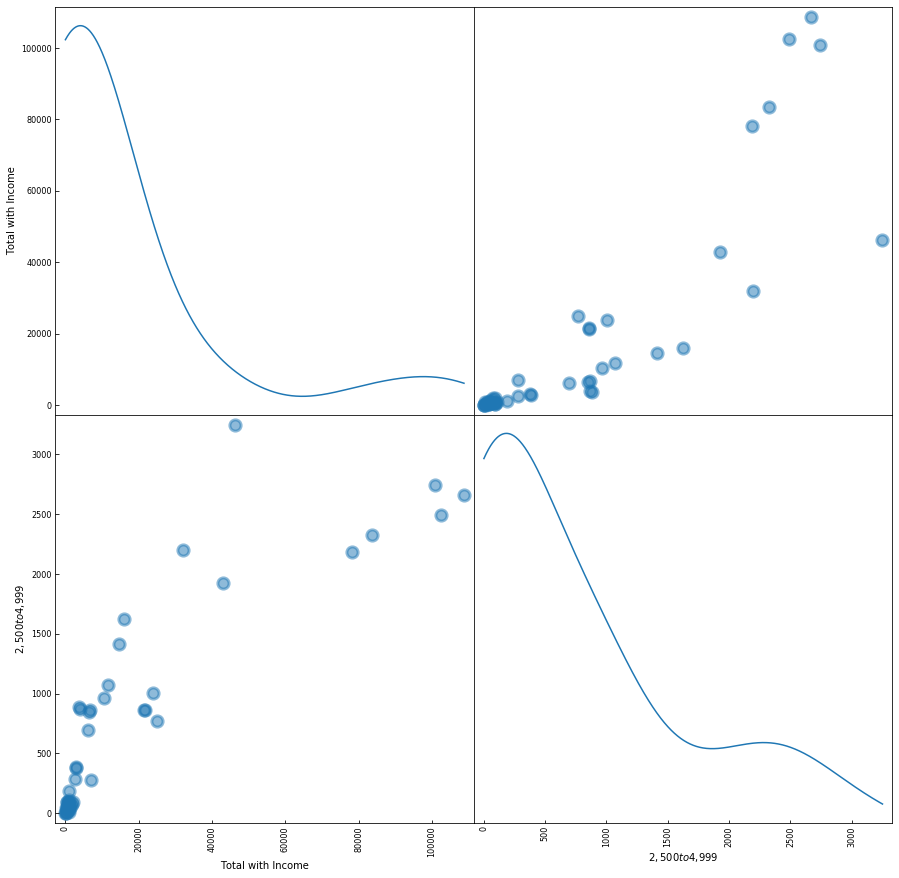

In [13]:
# only columns containing real numerical values 
# are plotted with scatter_matrix. 
# But we are interested in median income but it wont get plotted, 
# due to bad values in the column

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

# FBB missing figure caption. 

In [14]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

# FBB you should clean up your notebook! what is this empty cell??


In [15]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

In [16]:
# use scatter_matrix to make this plot... 

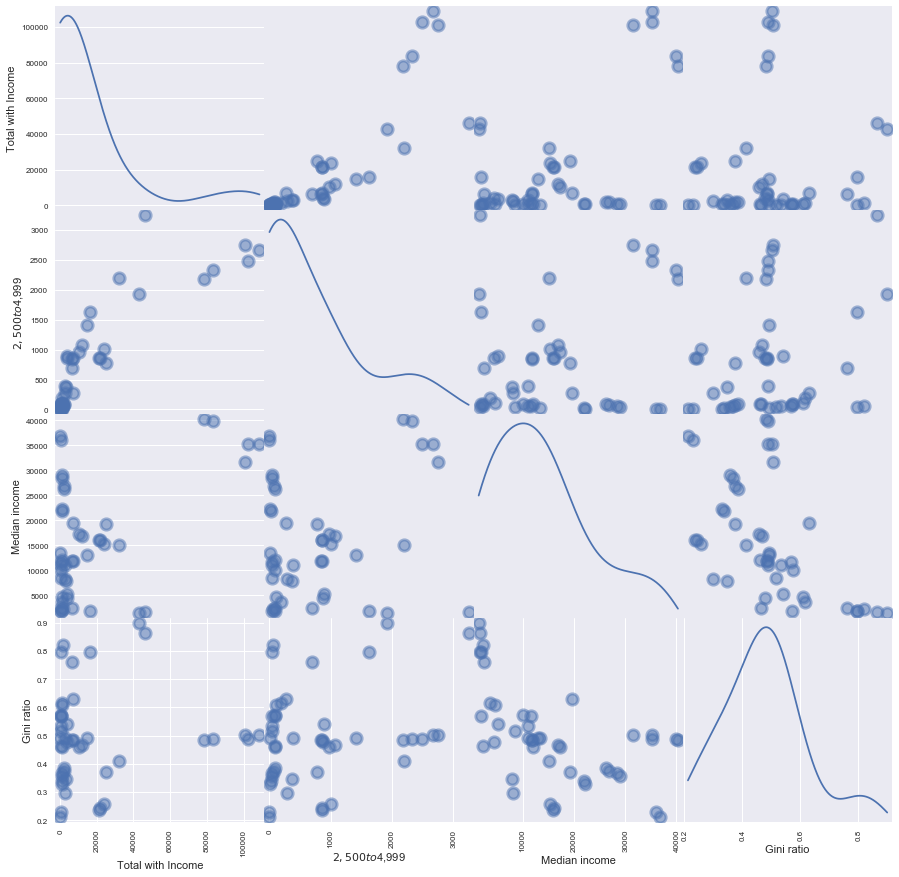

In [17]:
import seaborn

fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

# FBB missing figure caption. 

In [18]:
# do the same for all female

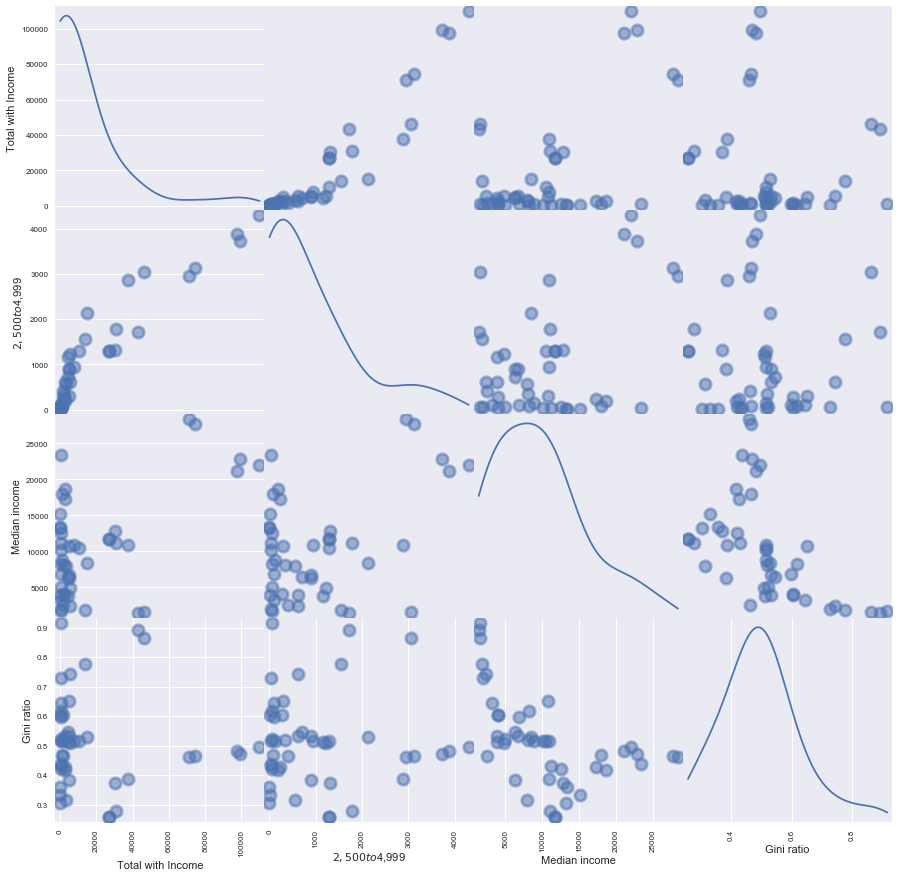

In [19]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

# FBB missing figure caption. 

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

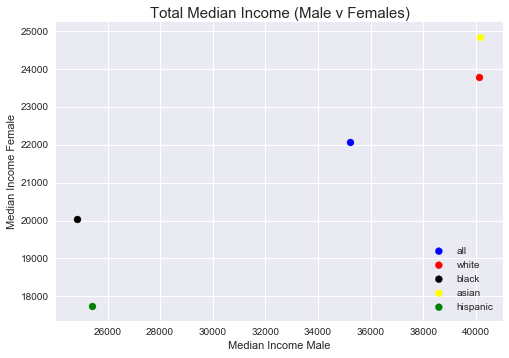

In [20]:
##plotting the Total median incame by race
##pl.scatter...
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color='blue', label = 'all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color='red', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color='black', label = 'black')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color='yellow', label = 'asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color='green', label = 'hispanic')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')

## Figure 1: Total Median Income (male v female), the plot shows that there is vast differnce in gender partity among races.

# FBB : if you want to show a line fit of the same quantity on the x and y axis, and particularly because you want to show inequality, make a square plot. This way it is intuitive to understand that the line at 45deg is equality.

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

In [21]:
#Defining array 
x = [[allmales['white']['Median income'][1], allmales['black']['Median income'][1], allmales['asian']['Median income'][1], 
              allmales['hispanic']['Median income'][1]], [allfemales['white']['Median income'][1], allfemales['black']['Median income'][1], 
                                                          allfemales['asian']['Median income'][1], allfemales['hispanic']['Median income'][1]]]
x

[[40122.0, 24855.0, 40153.0, 25411.0], [23780.0, 20044.0, 24840.0, 17762.0]]

In [22]:
df = pd.DataFrame({'male':x[0], 'female':x[1]})

def line(a): #defining the line
    lm = smf.ols(formula='female ~ male', data = df).fit()
    return lm.params[1] * a + lm.params[0]
y = line(50000)
y

NameError: name 'smf' is not defined

In [ ]:
#fit with whichever method you prefer and plot here
#[...]
j = np.arange(10000.,50000.,10000)

pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color='blue', label = 'all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color='red', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color='black', label = 'black')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color='yellow', label = 'asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color='green', label = 'hispanic')
pl.plot( j, line(j), c="r", label = 'fit')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')

## Figure 2: Total Median Income (male v female), the plot shows that the income partity is distorted in favour of males as the slope of the regression line is higher than 45 degrees.

# Explain in the caption what your model (the line) is

# Plotting all Median Incomes

In [ ]:
##plotting the Total median incame by race
##pl.scatter...
pl.scatter(allmales['all']['Median income'], allfemales['all']['Median income'], color='grey', label = 'all')
pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], color='red', label = 'white')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], color='black', label = 'black')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], color='yellow', label = 'asian')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], color='green', label = 'hispanic')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')

## Figure 3: All Median Income (male v female), the plot shows that there is vast differnce in gender partity among races.

# FBB how dows it show it? you should explain not just state (also I actually do not think this plot shows that)

## Defining panda dataframe for each of the races for ease of work

In [ ]:
import statsmodels.formula.api as smf

In [1]:
alleth = pd.DataFrame()
    
alleth['male'] = allmales['white']['Median income']
alleth['female'] = allfemales['white']['Median income']
alleth.head()

# FBB I suggest to dropna

NameError: name 'pd' is not defined

In [172]:
white = pd.DataFrame()
    
white['male'] = allmales['white']['Median income']
white['female'] = allfemales['white']['Median income']
white.head()

,male,female
0,NaN,NaN
1,40122.0,23780.0
2,44882.0,30626.0
3,45554.0,30919.0
4,20445.0,10328.0


In [173]:
black = pd.DataFrame()
    
black['male'] = allmales['black']['Median income']
black['female'] = allfemales['black']['Median income']
black.head()

,male,female
0,NaN,NaN
1,24855.0,20044.0
2,30389.0,25971.0
3,30686.0,26165.0
4,10786.0,10313.0


In [174]:
asian = pd.DataFrame()
    
asian['male'] = allmales['asian']['Median income']
asian['female'] = allfemales['asian']['Median income']
asian.head()

,male,female
0,NaN,NaN
1,40153.0,24840.0
2,45926.0,31363.0
3,45950.0,31802.0
4,30916.0,15231.0


In [175]:
hispanic = pd.DataFrame()
    
hispanic['male'] = allmales['hispanic']['Median income']
hispanic['female'] = allfemales['hispanic']['Median income']
hispanic.head()

,male,female
0,NaN,NaN
1,25411.0,17762.0
2,26914.0,21261.0
3,27017.0,21411.0
4,19988.0,11020.0


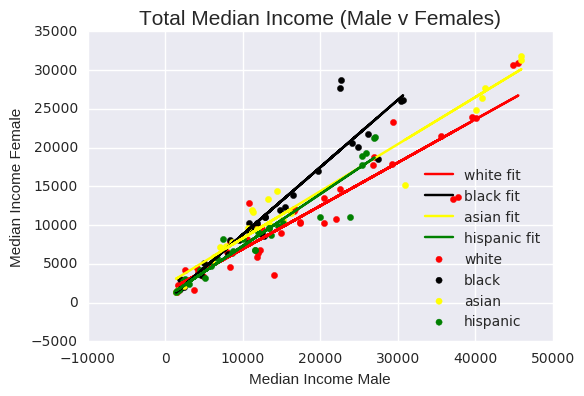

In [176]:
#Using regression to define fit lines for each race

#White
lmw = smf.ols(formula='female ~ male', data = white).fit()
white.loc[:,"pred"]= lmw.params[1] * white.male + lmw.params[0]

#Black
lmb = smf.ols(formula='female ~ male', data = black).fit()
black.loc[:,"pred"]= lmb.params[1] * black.male + lmb.params[0]

#Asian
lma = smf.ols(formula='female ~ male', data = asian).fit()
asian.loc[:,"pred"]= lma.params[1] * asian.male + lma.params[0]

#Hispanic
lmh = smf.ols(formula='female ~ male', data = hispanic).fit()
hispanic.loc[:,"pred"]= lmh.params[1] * hispanic.male + lmh.params[0]

#Ploting the regression
##plotting the Total median incame by race
##pl.scatter...

pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], color='red', label = 'white')
pl.plot(white.male, white.pred, c="r", label = 'white fit')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], color='black', label = 'black')
pl.plot(black.male, black.pred, c="black", label = 'black fit')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], color='yellow', label = 'asian')
pl.plot(asian.male, asian.pred, c="yellow", label = 'asian fit')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], color='green', label = 'hispanic')
pl.plot(hispanic.male, hispanic.pred, c="green", label = 'hispanic fit')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')


## Figure 4: All Median Income (male v female), the plot shows that the regression lines for each race is different. 
# FBB Meaning what?? discuss the line that goes through (0,0) and the lines that do not! Does it make sence to force the model to go through (0,0)? All these considerations are missing

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [177]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

In [178]:
joined = [white, black, asian, hispanic]
allfit = pd.concat(joined)

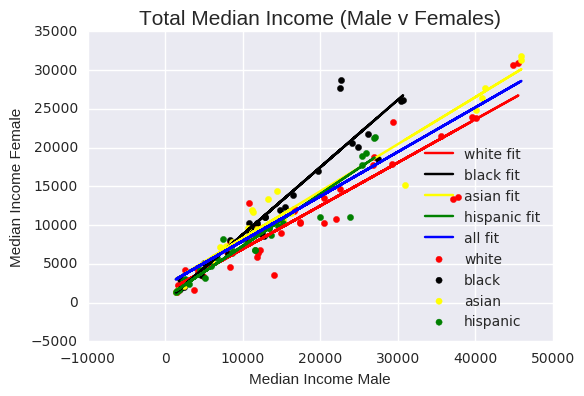

In [179]:
#...
allfit.loc[:,"pred"]= beta0 + beta1 * allfit.male #defining regression line using Fedrica's calculations

#Ploting regression line using Fedrica's calculations

pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], color='red', label = 'white')
pl.plot(white.male, white.pred, c="r", label = 'white fit')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], color='black', label = 'black')
pl.plot(black.male, black.pred, c="black", label = 'black fit')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], color='yellow', label = 'asian')
pl.plot(asian.male, asian.pred, c="yellow", label = 'asian fit')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], color='green', label = 'hispanic')
pl.plot(hispanic.male, hispanic.pred, c="green", label = 'hispanic fit')
pl.plot(allfit.male, allfit.pred, c="b", label = 'all fit')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')

## Figure 6: All Median Income (male v female), the regression fit line shows that there is overall income imbalance among races. While white community has more gender income parity when compared to overall, while rest are more stark.

# FBB NO! the white comunitu as seen in this plot has the shallower slope and the overall lower income of female per male. It has the largest INEQUALITY. 
# however in reality shit is driven by the fact that at higer income the disparity is larger, and  the white community reaches higher income.

# FBB you should remove my instructions. BUt if you do not at least keep them in the right place! You already went through question 5 described in the instruction below. Keep your homework neat!

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [180]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [181]:
lm_all = smf.ols(formula='female ~ male', data = allfit).fit()
lm_all0 = smf.ols(formula='female ~ male -1', data = allfit).fit()
lm_all0.params

male    0.687873
dtype: float64

# FBB all outputs should be described. What are the numbers above?

In [182]:
allfit.loc[:,"pred1"]= lm_all.params[1] * allfit.male + lm_all.params[0]
allfit.loc[:,"pred0"]= lm_all0.params[0] * allfit.male 

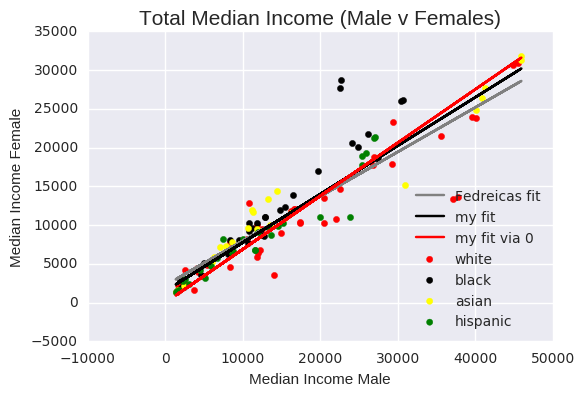

In [183]:
pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], color='red', label = 'white')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], color='black', label = 'black')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], color='yellow', label = 'asian')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], color='green', label = 'hispanic')
pl.plot(allfit.male, allfit.pred, c="grey", label = 'Fedreicas fit')
pl.plot(allfit.male, allfit.pred1, c="black", label = 'my fit')
pl.plot(allfit.male, allfit.pred0, c="red", label = 'my fit via 0')
pl.ylabel('Median Income Female')
pl.xlabel('Median Income Male')
pl.title('Total Median Income (Male v Females)', size = 15) 
pl.legend(loc='lower right')

## Figure 7: All Median Income (male v female), the plot shows that there is difference in regression lines calculated using different methods.

In [184]:
# fit and plot...
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?


### CAPTION: ...

In [185]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [186]:
#stipend = $24000 annually
def stipend(stp): #defining the line
    return print ('A Female will recieve $ ', lm_all.params[1] * stp + lm_all.params[0]) #Using the numbers from my regression fit
stipend(24000)

A Female will recieve $  16494.3461349


# FBB The statement above should state what is the chosen male income, otherwise the statement "A Female will recieve 16494.3461349" is out of context and meaningless

# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

# There is a marked difference in median income among races and gender income parity among the races. But there is need for more data to zero down on any conclusion. 

# FBB there is covariance between ethnicity and income which makes the fit, especially when done for only median income, unreliable
